<a href="https://colab.research.google.com/github/BrendaChepkoech/Hass-Consult-Project/blob/main/Brenda_Chepkoech_week_7_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

### a) Specifying the Question

As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

### b) Defining the Metric for Success

Beding able to create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.

### c) Understanding the context 

Hass Consulting Company is a real estate leader with over 25 years of experience.
Hass Consult with its wealth of experience continuously reaps new benefits from opportunities presented by changing market dynamics as well as evolving business and property cycles.

### d) Recording the Experimental Design



*   Import the relevant libraries that we will use in our analysis
*   Read and explore the dataset
*   Data cleaning
*   Perform univariate, bivariate and multivariate analysis 
*   Check for multicollinearity
*   Create residual plots for your models, and assess heteroskedasticity using Barlett's test.
*   Created the different regression models
*   Then evaluated the performance of different models


### e) Data Relevance

The data we have is relevant since we need key factors such as bedrooms, bathrooms, sqft_living, sqft_lot,floors,waterfront, view, condition and price to be used to accurately predict the sale of prices of houses.

Dataset link;  http://bit.ly/IndependentProjectWeek7Dataset

Below is the dataset glossary:

Id 

price  - Price of the house

bedrooms - Number of Bedrooms

bathrooms - Number of Bathrooms

sqft_living - Square feet area of living area

sqft_lot  - Square feet area of parking Layout

floors - Number of Floors

waterfront - Whether waterfront is there or not

view - Number of Views

grade - Grades

sqft_above

sqft_basement - Square feet area off basement

yr_built - Year the house is built

yr_renovated - Year the house is renovated

zipcode - zipcode os the house

lat : Latitude of the house

lon : Longitude of the house

sqft_living15

sqft_lot15

## 2. Reading the Data

In [321]:
# Loading libraries
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model, datasets
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [322]:
# Loading the Dataset
# Dataset url = http://bit.ly/StartupDataset
#
df=pd.read_csv("/content/house_data.csv")

## 3. Checking the Data

In [323]:
# Determining the no. of records in our dataset
#
df.shape

(21613, 20)

In [324]:
# Previewing the top of our dataset
#
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [325]:
# Previewing the bottom of our dataset
# 
df.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [326]:
# Checking whether each column has an appropriate datatype
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

## 5. Tidying the Dataset

In [327]:
# Checking for Outliers
#



In [328]:
# Identifying the Missing Data
#
df.isnull().sum().sum()
#No missing data

0

In [329]:
# Checking for duplicate values
df.duplicated().sum()

#dropping duplicates
df.drop_duplicates()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [330]:
#checking column names
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [331]:
#dropping irrelevant columns that are not useful in our analysis
df.drop(['id'],axis = 1, inplace = True)

## 6. Exploratory Analysis

## Univariate Analysis

In [332]:
#Numerical variables
#Measures of central tendency for the household size
#mean
df.mean()

price            540182.158793
bedrooms              3.370842
bathrooms             2.114757
sqft_living        2079.899736
sqft_lot          15106.967566
floors                1.494309
waterfront            0.007542
view                  0.234303
condition             3.409430
grade                 7.656873
sqft_above         1788.390691
sqft_basement       291.509045
yr_built           1971.005136
yr_renovated         84.402258
zipcode           98077.939805
lat                  47.560053
long               -122.213896
sqft_living15      1986.552492
sqft_lot15        12768.455652
dtype: float64

In [333]:
#mode
df.mode()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,350000.0,3.0,2.5,1300.0,5000.0,1.0,0.0,0.0,3.0,7.0,1300.0,0.0,2014.0,0.0,98103.0,47.5322,-122.29,1540.0,5000.0
1,450000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.5491,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.6624,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.6846,NaN,NaN,NaN


In [334]:
#median
df.median()

price            450000.0000
bedrooms              3.0000
bathrooms             2.2500
sqft_living        1910.0000
sqft_lot           7618.0000
floors                1.5000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1560.0000
sqft_basement         0.0000
yr_built           1975.0000
yr_renovated          0.0000
zipcode           98065.0000
lat                  47.5718
long               -122.2300
sqft_living15      1840.0000
sqft_lot15         7620.0000
dtype: float64

In [335]:
# Measures of dispersion
#standard deviation
df.std()

price            367362.231718
bedrooms              0.930062
bathrooms             0.770163
sqft_living         918.440897
sqft_lot          41420.511515
floors                0.539989
waterfront            0.086517
view                  0.766318
condition             0.650743
grade                 1.175459
sqft_above          828.090978
sqft_basement       442.575043
yr_built             29.373411
yr_renovated        401.679240
zipcode              53.505026
lat                   0.138564
long                  0.140828
sqft_living15       685.391304
sqft_lot15        27304.179631
dtype: float64

In [336]:
#kurtosis
df.kurt()

price             34.522444
bedrooms          49.063653
bathrooms          1.279902
sqft_living        5.243093
sqft_lot         285.077820
floors            -0.484723
waterfront       127.632494
view              10.893022
condition          0.525764
grade              1.190932
sqft_above         3.402304
sqft_basement      2.715574
yr_built          -0.657408
yr_renovated      18.701152
zipcode           -0.853479
lat               -0.676313
long               1.049501
sqft_living15      1.597096
sqft_lot15       150.763110
dtype: float64

In [337]:
#skewness
df.skew()

price             4.021716
bedrooms          1.974300
bathrooms         0.511108
sqft_living       1.471555
sqft_lot         13.060019
floors            0.616177
waterfront       11.385108
view              3.395750
condition         1.032805
grade             0.771103
sqft_above        1.446664
sqft_basement     1.577965
yr_built         -0.469805
yr_renovated      4.549493
zipcode           0.405661
lat              -0.485270
long              0.885053
sqft_living15     1.108181
sqft_lot15        9.506743
dtype: float64

In [338]:
# Quantiles
df.quantile([0.25,0.50,0.75])

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0.25,321950.0,3.0,1.75,1427.0,5040.0,1.0,0.0,0.0,3.0,7.0,1190.0,0.0,1951.0,0.0,98033.0,47.4710,-122.328,1490.0,5100.0
0.50,450000.0,3.0,2.25,1910.0,7618.0,1.5,0.0,0.0,3.0,7.0,1560.0,0.0,1975.0,0.0,98065.0,47.5718,-122.230,1840.0,7620.0
0.75,645000.0,4.0,2.50,2550.0,10688.0,2.0,0.0,0.0,4.0,8.0,2210.0,560.0,1997.0,0.0,98118.0,47.6780,-122.125,2360.0,10083.0


In [339]:
# Range
maximum = df.max()
minimum = df.min()
range = maximum - minimum
range

price            7.625000e+06
bedrooms         3.300000e+01
bathrooms        8.000000e+00
sqft_living      1.325000e+04
sqft_lot         1.650839e+06
floors           2.500000e+00
waterfront       1.000000e+00
view             4.000000e+00
condition        4.000000e+00
grade            1.200000e+01
sqft_above       9.120000e+03
sqft_basement    4.820000e+03
yr_built         1.150000e+02
yr_renovated     2.015000e+03
zipcode          1.980000e+02
lat              6.217000e-01
long             1.204000e+00
sqft_living15    5.811000e+03
sqft_lot15       8.705490e+05
dtype: float64

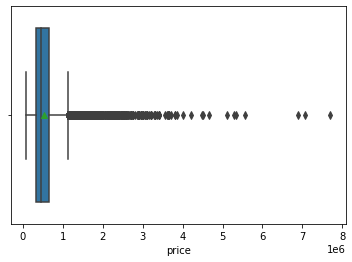

In [340]:
# Checking for outliers in the price column
sns.boxplot(df["price"],showmeans=True)


we have outliers but we shall not drop them since they might be useful in our analysis

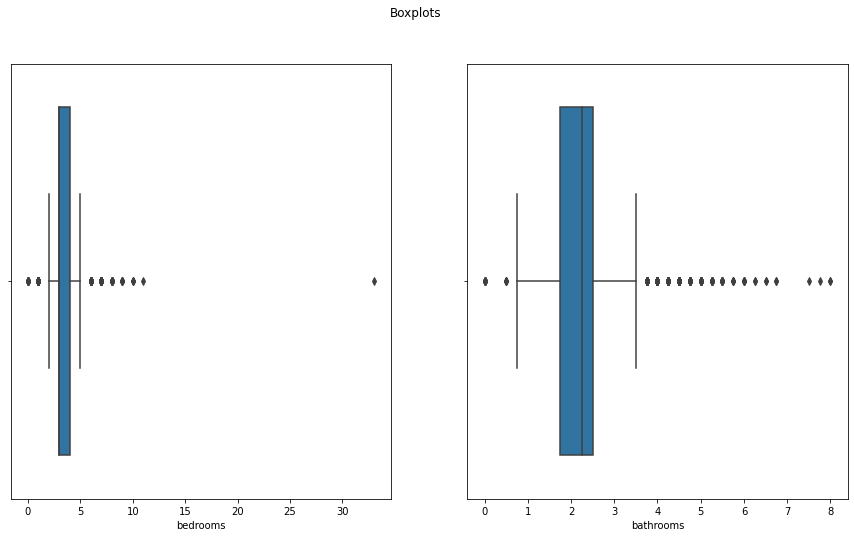

In [341]:
# Checking for outliers in the bedrooms and bathrooms
fig, axes = plt.subplots(1,2, figsize=(15, 8))
fig.suptitle('Boxplots')
sns.boxplot(df['bedrooms'], ax=axes[0])
sns.boxplot(df['bathrooms'], ax=axes[1])
plt.show()

we have outliers but we shall not drop them since they might be useful in our analysis.

In [342]:
#data decription
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


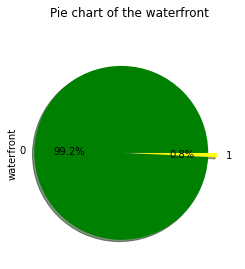

In [344]:
#Categorical variables
#Pie chart for waterfront
df["waterfront"].value_counts().plot(kind='pie',shadow = True,explode=(0.1,0), colors=['green','yellow'], autopct='%1.1f%%')
plt.title("Pie chart of the waterfront", y=1.1)
plt.show()

In [345]:
#Frequency table
df["waterfront"].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [346]:
#Frequency table
df["grade"].value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

In [347]:
#Frequency table
df["condition"].value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

## Bivariate analysis

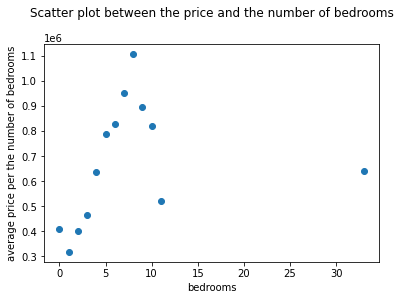

In [348]:
#creating a scatter plot for price  per the number of bedrooms
grp=df.groupby('bedrooms')['price'].mean().reset_index(name='average price per the number of bedrooms')
plt.scatter(grp['bedrooms'] , grp['average price per the number of bedrooms'])
plt.title("Scatter plot between the price and the number of bedrooms", y=1.1)
plt.xlabel('bedrooms')
plt.ylabel('average price per the number of bedrooms')
plt.show()

As we can see from the scatter plot, the average price of a house increases as the number of bedrooms increases

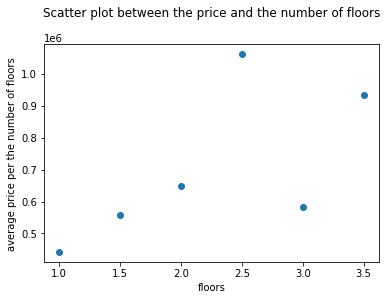

In [349]:
#creating a scatter plot for price  per the number of floors
grp=df.groupby('floors')['price'].mean().reset_index(name='average price per the number of floors')
plt.scatter(grp['floors'] , grp['average price per the number of floors'])
plt.title("Scatter plot between the price and the number of floors", y=1.1)
plt.xlabel('floors')
plt.ylabel('average price per the number of floors')
plt.show()

As the number of floors increases, the average price of the houses increases

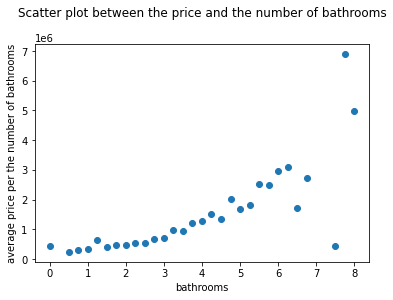

In [350]:
#creating a scatter plot for price  per the number of floors
grp=df.groupby('bathrooms')['price'].mean().reset_index(name='average price per the number of bathrooms')
plt.scatter(grp['bathrooms'] , grp['average price per the number of bathrooms'])
plt.title("Scatter plot between the price and the number of bathrooms", y=1.1)
plt.xlabel('bathrooms')
plt.ylabel('average price per the number of bathrooms')
plt.show()

From the scatter plot, we can see that as the number of bathrooms increase, the average prices of the house also increase

<function matplotlib.pyplot.show>

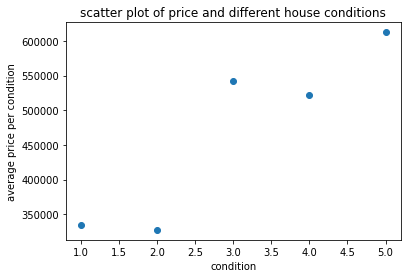

In [351]:
#condition 
grp=df.groupby("condition")["price"].mean().reset_index(name="average price per condition")
plt.scatter(grp["condition"], grp["average price per condition"])
plt.title("scatter plot of price and different house conditions")
plt.xlabel("condition")
plt.ylabel("average price per condition")
plt.show

We can also see that  the price of the house increases as the condition becomes better

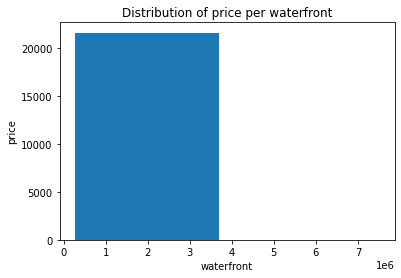

<Figure size 288x216 with 0 Axes>

In [352]:
#creating a histogram for price and waterfront
plt.hist(df["price"], bins=2, histtype='bar', rwidth=0.9)
plt.xlabel("waterfront")
plt.ylabel('price')
plt.title('Distribution of price per waterfront') 
plt.figure(figsize=(4, 3))
plt.show()
#waterfront and condition

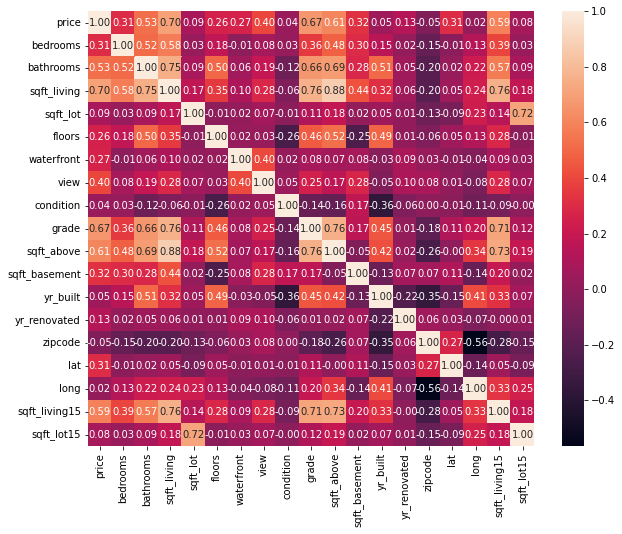

In [353]:
#Plotting a heat map to show correlation between the different variables
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True,fmt=".2f");
plt.show()

## Multivariate analysis

In [354]:
#plotting a parplot
#sns.pairplot(df)

## 7. Implementing the Solution

## Checking multicollinearity

In [355]:
#Checking multicollinearity
# Pick independent variables only.
independent=df.drop(columns=["price"])

# Let's display the correlations between the variables
correlations=independent.corr()
correlations

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248
sqft_above,0.477600,0.685342,0.876597,0.183512,0.523885,0.072075,0.167649,-0.158214,0.755923,1.000000,-0.051943,0.423898,0.023285,-0.261190,-0.000816,0.343803,0.731870,0.194050


The coefficient of 1 across the diagonal makes sense, as a variable is perfectly correlated to itself.

In [356]:
# Checking for multicollinearity using the VIF 
vif= pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)
vif

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.652063,-0.461171,-1.992659e-01,0.049361,0.049695,0.063235,0.114111,-0.050767,0.307048,-7.011864e-01,-3.915263e-01,0.134498,0.045454,0.080112,0.050789,0.017395,0.025213,0.085400
bathrooms,-0.461171,3.350793,-5.065088e+00,-0.024127,-0.675075,0.009760,-0.041645,-0.137020,-0.268005,3.294637e+00,1.364690e+00,-0.935779,-0.259782,0.041796,-0.040956,0.054055,0.092133,0.071471
sqft_living,-0.194966,-5.071189,-3.387473e+13,-0.124043,0.517568,0.452759,-0.595614,-0.364700,-0.782729,3.054236e+13,1.632343e+13,1.667302,0.064509,-0.145859,0.023060,-0.122991,-0.994869,-0.183892
sqft_lot,0.049361,-0.024127,-1.235861e-01,2.102522,0.045263,0.027310,-0.058998,0.030561,-0.053851,-8.783379e-02,1.708186e-02,0.098762,0.021443,-0.002610,0.053366,-0.133162,0.163944,-1.459319
floors,0.049695,-0.675075,5.202809e-01,0.045263,2.011907,-0.005281,-0.040627,0.089673,-0.230851,-9.729981e-01,3.653124e-01,-0.481480,-0.080603,-0.170766,-0.127637,0.164067,0.272617,0.072658
waterfront,0.063235,0.009760,4.535901e-01,0.027310,-0.005281,1.203766,-0.492545,-0.012670,0.049240,-5.210685e-01,-2.222588e-01,-0.021050,-0.065403,0.022551,0.009896,0.027438,0.054452,-0.018470
view,0.114111,-0.041645,-5.970543e-01,-0.058998,-0.040627,-0.492545,1.435160,-0.021475,-0.185237,5.777019e-01,3.111248e-02,0.151620,-0.040236,-0.140679,0.118486,0.071508,-0.325615,-0.007493
condition,-0.050767,-0.137020,-3.656613e-01,0.030561,0.089673,-0.012670,-0.021475,1.249475,-0.054454,3.852153e-01,7.868618e-02,0.561549,0.206672,0.161268,0.063674,-0.007029,0.075861,-0.028255
grade,0.307048,-0.268005,-7.836861e-01,-0.053851,-0.230851,0.049240,-0.185237,-0.054454,3.417046,-9.023339e-01,-1.081529e-01,-0.638980,-0.071422,0.083321,-0.330869,0.393834,-0.911603,0.071874
sqft_above,-0.699368,3.299068,3.054236e+13,-0.087524,-0.970955,-0.520315,0.576573,0.384385,-0.903970,-2.753782e+13,-1.471765e+13,-0.983300,-0.059088,0.055792,0.160279,-0.230789,-0.638711,-0.009918


The VIF score for each variable is found alongside the downwards sloping diagonal.
We shall not drop any column since the VIF scores are small.

## Residual plots

In [358]:
#Lets start by picking our target and feature variables 
#then split our data into train and test set

X=independent.values
y=df["price"].values

X_train,X_test, Y_train,Y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

#Fitting our linear regression model
model=LinearRegression()
model.fit(X_train,Y_train)

# This is our prediction for price
y_pred=model.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, Y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

1225.042967995593

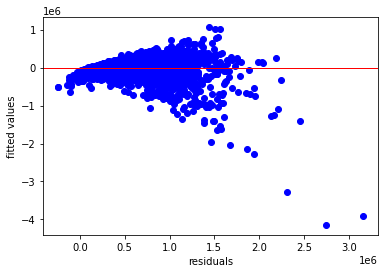

In [359]:
#Residual plots
plt.scatter(y_pred,residuals, color="blue")
plt.xlabel("residuals")
plt.ylabel("fitted values")
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

## Heteroskedasticity test

In [360]:
#We shall use the Barlett's test to check for heteroskedasticity

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(p_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

9.271314932912591e-196
the variances are homogeneous!


## Multiple Linear Regression

In [414]:
#split data into feature and target
X=independent.values
y=df["price"].values

#splitting the data into train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [415]:
#standardizing our dataset using standard scaller 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [416]:
#Selecting our model
model = LinearRegression()
model.fit(X_train,y_train)

#Fitting the model:
model.fit(X_train,y_train )

LinearRegression()

In [417]:
#Making predictions
y_pred = model.predict(X_test)

# To compare the actual output values for X_test with the predicted values
# 
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})\
#Checking the accuracy:
print("The OLS Accuracy is :",model.score(X_test, y_test )* 100)

The OLS Accuracy is : 69.4953671554639


In [365]:
#printing the RMSE
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 36326416754.03877


The accuracy of our multiple linear regression model is 61.09% and MSE is 36326416754.03877.
We will challenge the solution by trying out the other regression techniques with the aim of improving our prediction accuracy.

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






## Ridge Regression

In [367]:
#split data into feature and target
X=independent.values
y=df[['price']].values

In [368]:
#start building our model and choosing parameters
model=Ridge(normalize=True)
search=GridSearchCV(estimator=model,param_grid={"alpha":np.logspace(-2,12,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

# We now use the .fit function to run the model and then use the .best_params_ and
# .best_scores_ function to determine the models strength. 
search.fit(X,y)
search.best_params_

abs(search.best_score_) 

41016657649.8212

In [369]:
#printing the best parameter
print(search.best_params_)

{'alpha': 0.01}


In [390]:
#fitting our model with the ridge information and finding the mean squared error
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
y_pred=ridge.predict(X)
print("Ridge MSE:", mean_squared_error(y,y_pred))

Ridge MSE: 40524344765.438995


In [393]:
#Checking the accuracy:
print("Accuracy:",ridge.score(X_test, y_test )* 100)

Accuracy: 69.63675545658428


After evaluating the performance of our ridge model, we can see that there is no huge difference between the accuracies of the two models (69.63%) 

The Ridge MSE is slightly higher than OLS MSE which means that OLS is better that Ridge.

## Lasso Regression

In [320]:
#split data into feature and target
X=independent.values
y=df[['price']].values

In [319]:
#lets start building our model
model=Lasso(normalize=True)
search=GridSearchCV(model,param_grid={"alpha":np.concatenate((np.arange(-2,6,4),np.arange(2,8,0.5)))},cv=10)

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
search.fit(X_train, y_train) 

print("lasso best parameters:", search.best_params_) 


lasso best parameters: {'alpha': 3.5}


In [395]:
## Creating lasso regression with alpha value of 0.1
model=Lasso(alpha= 3.5,normalize=True)
model.fit(X,y)
y_pred=model.predict(X_test)
print("lasso MSE:", mean_squared_error(y_test,y_pred))

lasso MSE: 36135781199.93307


In [396]:
#Checking the accuracy:
print("Accuracy:",model.score(X_test, y_test )* 100)

Accuracy: 69.65545086601766


Using Lasso regression technique, we can see that there is a slight improvement in accuracy (69.65%) as compared to the accuracy of our OLS model.

The MSE is also slighly smaller than the other models.

## Elastic Net Regression

In [402]:
#split data into feature and target
X=independent.values
y=df[['price']].values

In [403]:
model=ElasticNet(normalize=True)
search=GridSearchCV(model,param_grid={'alpha':np.logspace(-4,10,12),"l1_ratio":[0.5,0.3,0.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [404]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(X,y)
search.best_params_
abs(search.best_score_)

print("Elastic net best parameters:", search.best_params_) 

Elastic net best parameters: {'alpha': 0.0001, 'l1_ratio': 0.8}


In [405]:
## Creating lasso regression with alpha value of 0.1
elastic=ElasticNet(normalize=True,alpha=0.0001,l1_ratio=0.8)
elastic.fit(X,y)
y_pred=elastic.predict(X)
print("Elastic Net MSE:", mean_squared_error(y,y_pred)) 

Elastic Net MSE: 44089568915.1498


In [406]:
#Checking the accuracy:
print("Accuracy:",elastic.score(X_test, y_test )* 100)

Accuracy: 67.21876120453287


From the ElasticNet regression we can see that using the model is not justified because its accuracy of 67.21% is smaller that the OLS and the MSE is way bigger compared to the other models.

## Quantile regression

In [421]:
# We will use the python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf

# Finding the regression coefficients for the conditioned median, 0.5 quantile
model = smf.quantreg('price ~ bedrooms + bathrooms +sqft_living	+ sqft_lot + floors + waterfront + view + condition+ grade+ sqft_above + sqft_basement+ yr_built + yr_renovated + zipcode + lat + long	+ sqft_living15 + sqft_lot15', df)

regmodel= model.fit(q=0.75)

# Then print out the summary of model
print(regmodel.summary())



ValueError: ignored

**Findings**

After evaluating the performance of the different regression models, we can see that the Lasso (Least Absolute Shrinkage and Selection Operator) model gave us the best accuracy score of (69.65%) as compared to the accuracy of our OLS model also the MSE is also slighly smaller than the other models and thus would be the most appropriate regression model to use in predicting the prices of houses in the given Hass Consulting dataset.

The Lasso model performs both feature/independent variable selection and regularization using the l1 penalty in order to enhance the accuracy of predicting the housing prices and interpretability of the resulting coefficients